In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

# ruta_monic = "C:\\Users\\monic\\ml_accident_bgta"
# sys.path.append(ruta_monic)

from src.config.setup import SetupConfig
from src.data_workflow.create_tables.create_tables import retrieve_all_table_data

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium

**Para acceder a los datos lo podemos hacer usando la función:**

`retrieve_all_table_data(<table_name>)`

Parámetros:
- table_name: nombre de la tabla

Para acceder al nombre de la tabla, hacerlo a tráves de la clase SetupConfig:
- `SetupConfig.TABLE_ACCIDENTE`
- `SetupConfig.TABLE_ACTOR_VIAL`
- `SetupConfig.TABLE_CAUSA`
- `SetupConfig.TABLE_LESIONADO`
- `SetupConfig.TABLE_MUERTO`
- `SetupConfig.TABLE_VEHICULO`
- `SetupConfig.TABLE_VIA`

# Lectura base de datos

In [2]:
LESIONADO = retrieve_all_table_data(SetupConfig.TABLE_LESIONADO)
print(f'El dataset tiene {LESIONADO.shape[0]} filas y {LESIONADO.shape[1]} columnas ')

MUERTO = retrieve_all_table_data(SetupConfig.TABLE_MUERTO)
print(f'El dataset tiene {MUERTO.shape[0]} filas y {MUERTO.shape[1]} columnas ')

ACCIDENTE = retrieve_all_table_data(SetupConfig.TABLE_ACCIDENTE)
print(f'El dataset tiene {ACCIDENTE.shape[0]} filas y {ACCIDENTE.shape[1]} columnas ')

VEHICULO = retrieve_all_table_data(SetupConfig.TABLE_VEHICULO)
print(f'El dataset tiene {VEHICULO.shape[0]} filas y {VEHICULO.shape[1]} columnas ')

ACTORVIAL = retrieve_all_table_data(SetupConfig.TABLE_ACTOR_VIAL)
print(f'El dataset tiene {ACTORVIAL.shape[0]} filas y {ACTORVIAL.shape[1]} columnas ')

CAUSA = retrieve_all_table_data(SetupConfig.TABLE_CAUSA)
print(f'El dataset tiene {CAUSA.shape[0]} filas y {CAUSA.shape[1]} columnas ')

VIA = retrieve_all_table_data(SetupConfig.TABLE_VIA)
print(f'El dataset tiene {VIA.shape[0]} filas y {VIA.shape[1]} columnas ')


El dataset tiene 250182 filas y 16 columnas 
El dataset tiene 8106 filas y 18 columnas 
El dataset tiene 473883 filas y 18 columnas 
El dataset tiene 1443037 filas y 9 columnas 
El dataset tiene 1677376 filas y 14 columnas 
El dataset tiene 683654 filas y 10 columnas 
El dataset tiene 483952 filas y 19 columnas 


# Descriptiva univariada

## Accidente

In [6]:
ACCIDENTE.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,1,A000640275,4484660,2017-06-11 19:00:00,05:30:00,2017,JUNIO,LUNES,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2017-06-12 00:30:00,4.693807,-74.090924,10006772.0,221236.0
1,2,A001515603,10583520,2022-10-28 19:00:00,10:55:00,2022,OCTUBRE,SABADO,KR 111 A - CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2022-10-29 05:55:00,4.717638,-74.119697,10000591.0,NaN
2,3,A1241594,449558,2012-12-14 19:00:00,20:30:00,2012,DICIEMBRE,SABADO,KR 4-CL 91 02,SOLO DANOS,CHOQUE,CHAPINERO,BOGOTA DC,2012-12-15 15:30:00,4.669288,-74.040677,2002328.0,35683.0
3,4,A001516620,10583513,2022-10-31 19:00:00,14:58:00,2022,NOVIEMBRE,MARTES,KR 72 - CL 148 02,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022-11-01 09:58:00,4.737015,-74.066101,11005846.0,NaN
4,5,A000035070,513150,2014-10-25 19:00:00,21:25:00,2014,OCTUBRE,DOMINGO,AC 72-KR 68F 02,CON HERIDOS,ATROPELLO,ENGATIVA,BOGOTA DC,2014-10-26 16:25:00,4.679568,-74.087407,10008600.0,43287.0


In [32]:
## NUMERO DE ACCIDENTES AÑO
tabla_year = ACCIDENTE.groupby(['ANO_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")

## NUMERO DE ACCIDENTES MES
tabla_mes = ACCIDENTE.groupby(['MES_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")
orden_meses = pd.DataFrame({"MES":["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO","SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"],
                            "MES_NUM": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})

tabla_mes = pd.merge(tabla_mes, orden_meses, left_on="MES_OCURRENCIA_ACC", right_on="MES", how = "left")
tabla_mes = tabla_mes.sort_values(by='MES_NUM').reset_index(drop=True)

## NUMERO ACCIDENTES POR DIA
tabla_dia = ACCIDENTE.groupby(['DIA_OCURRENCIA_ACC']).size().reset_index(name="CONTEO")
orden_dias = pd.DataFrame({"DIA":["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SABADO", "DOMINGO"],
                            "DIA_NUM": [1, 2, 3, 4, 5, 6, 7]})

tabla_dia = pd.merge(tabla_dia, orden_dias, left_on="DIA_OCURRENCIA_ACC", right_on="DIA", how = "left")
tabla_dia = tabla_dia.sort_values(by='DIA_NUM').reset_index(drop=True)

# ## TABLA ACCIDENTE POR HORA
ACCIDENTE['HORA_OCURRENCIA_ACC_aux'] = pd.to_datetime(ACCIDENTE['HORA_OCURRENCIA_ACC']).dt.strftime('%H:00:00')
tabla_hora = ACCIDENTE.groupby(['HORA_OCURRENCIA_ACC_aux']).size().reset_index(name="CONTEO")


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 8))

# Gráficos de año
sns.barplot(x='ANO_OCURRENCIA_ACC', y='CONTEO', data=tabla_year, ax=ax1)
ax1.set_title('')
ax1.set_ylabel('Cantidad de accidentes')
ax1.set_xlabel('Año de ocurrencia')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#Grafico mes
sns.barplot(x='MES_OCURRENCIA_ACC', y='CONTEO', data=tabla_mes, ax=ax2)
ax2.set_title('')
ax2.set_ylabel('')
ax2.set_xlabel('Mes de ocurrencia')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=45)

#Grafico de dia
sns.barplot(x='DIA_OCURRENCIA_ACC', y='CONTEO', data=tabla_dia, ax=ax3)
ax3.set_title('')
ax3.set_ylabel('Cantidad de accidentes')
ax3.set_xlabel('Dia de ocurrencia')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=45)


# Gráfico de línea
sns.lineplot(x='HORA_OCURRENCIA_ACC_aux', y='CONTEO', data=tabla_hora, ax=ax4)
ax4.set_title('')
ax4.set_ylabel('')
ax4.set_xlabel('Hora de ocurrencia')
ax4.set_xticklabels(ax1.get_xticklabels(), rotation=45)


# Ajustar diseño
plt.tight_layout()
plt.show()


C:\Users\monic\AppData\Local\Temp\ipykernel_7660\3117740051.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ACCIDENTE['HORA_OCURRENCIA_ACC_aux'] = pd.to_datetime(ACCIDENTE['HORA_OCURRENCIA_ACC']).dt.strftime('%H:00:00')


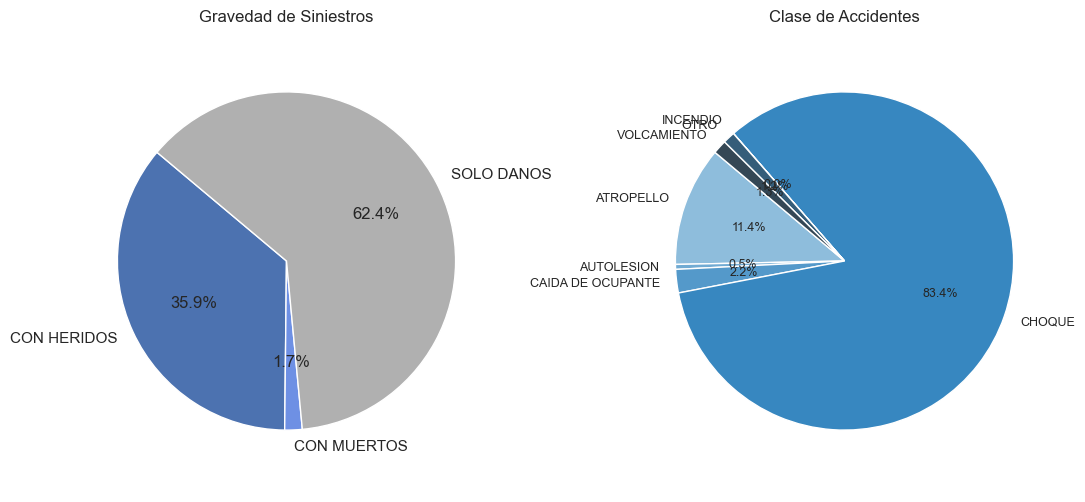

In [60]:
## GRAVEDAD y CLASE_ACC
tabla_gravedad = ACCIDENTE.groupby(["GRAVEDAD"]).size().reset_index(name="CONTEO")
tabla_claseacc = ACCIDENTE.groupby(["CLASE_ACC"]).size().reset_index(name="CONTEO")

paleta_gravedad = ["#4c72b0", "#6e90e4", "#b0b0b0"]
paleta_claseacc = sns.color_palette("Blues_d", len(tabla_claseacc))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.subplots_adjust(wspace=0.5) 

# Gráfico de pastel para gravedad
ax1.pie(tabla_gravedad["CONTEO"], labels=tabla_gravedad["GRAVEDAD"], autopct='%1.1f%%', startangle=140, colors=paleta_gravedad)
ax1.set_title('Gravedad de Siniestros')
ax1.axis('equal') 

# Gráfico de pastel para clase de accidente
ax2.pie(tabla_claseacc["CONTEO"], labels=tabla_claseacc["CLASE_ACC"], autopct='%1.1f%%', startangle=140, colors=paleta_claseacc, textprops={'fontsize': 9})
ax2.set_title('Clase de Accidentes')
ax2.axis('equal')  

# Mostrar los gráficos
plt.show()


In [65]:
## MAPA GRAVEDAD ACCIDENTES
import folium
from folium.plugins import HeatMap
import pandas as pd

tabla_georef = ACCIDENTE.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name="CONTEO")
tabla_georef = tabla_georef.sort_values(by="CONTEO", ascending=False)

m = folium.Map(location=[tabla_georef['LATITUD'].mean(), tabla_georef['LONGITUD'].mean()], zoom_start=11)

# Convertir las coordenadas a una lista de listas
data = tabla_georef[['LATITUD', 'LONGITUD', 'CONTEO']].values.tolist()

gradient = {0.2: 'blue',  0.6: 'yellow',  1: 'red'}
# Crear el mapa de calor
HeatMap(data, radius=10, max_zoom=13, gradient=gradient).add_to(m)

# Guardar el mapa
m.save('mapa_accidentes_heatmap.html')

## Lesionado y Muerto

In [66]:
# Tratamientos
LESIONADO = LESIONADO.drop(["OBJECTID"], axis=1)
LESIONADO["ESTADO_ACCIDENTADO"] = "LESIONADO"

MUERTO = MUERTO.drop(["OBJECTID", "MUERTE_POSTERIOR", "FECHA_POSTERIOR_MUERTE"], axis=1)
MUERTO["ESTADO_ACCIDENTADO"] = "MUERTO"

ESTADO_ACCIDENTADO = pd.concat([LESIONADO, MUERTO], axis=0, ignore_index=True).sort_values(by="FORMULARIO")
print(ESTADO_ACCIDENTADO.shape, 
      "\n NA CLASE_ACC", sum(ESTADO_ACCIDENTADO["CLASE_ACC"].isna()),
      "\n NA CONDICION", sum(ESTADO_ACCIDENTADO["CONDICION"].isna()), 
      "\n NA CODIGO_VEHICULO", sum(ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].isna())
      )

print(ESTADO_ACCIDENTADO.shape)

(258288, 16) 
 NA CLASE_ACC 37 
 NA CONDICION 1 
 NA CODIGO_VEHICULO 64399
(258288, 16)


In [67]:
ESTADO_ACCIDENTADO.head()

,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,GENERO,EDAD,ESTADO_ACCIDENTADO
51392,319457,20092200,2002-05-18 19:00:00,15:45:00,2002,MAYO,DOMINGO,2002-05-19 10:45:00,KR 10-9 30,ATROPELLO,CANDELARIA,NaN,PEATON,SIN INFORMACION,24.0,LESIONADO
51393,319458,20092200,2002-05-18 19:00:00,15:45:00,2002,MAYO,DOMINGO,2002-05-19 10:45:00,KR 10-9 30,ATROPELLO,CANDELARIA,NaN,PEATON,SIN INFORMACION,21.0,LESIONADO
51394,319562,20127000,2002-05-16 19:00:00,13:30:00,2002,MAYO,VIERNES,2002-05-17 08:30:00,KR 24-33 S 57,CAIDA DE OCUPANTE,RAFAEL URIBE URIBE,1.0,PASAJERO,SIN INFORMACION,18.0,LESIONADO
51416,319866,20222900,2002-05-21 19:00:00,18:45:00,2002,MAYO,MIERCOLES,2002-05-22 13:45:00,KR 9-85 32,ATROPELLO,CHAPINERO,NaN,PEATON,SIN INFORMACION,8.0,LESIONADO
51435,507170,20280100,2002-05-26 19:00:00,12:00:00,2002,MAYO,LUNES,2002-05-27 07:00:00,KR 10-16 37,OTRO,SANTA FE,1.0,CONDUCTOR,MASCULINO,21.0,LESIONADO


In [73]:
ESTADO_ACCIDENTADO.groupby(["ESTADO_ACCIDENTADO","CONDICION"], dropna=False).size()

ESTADO_ACCIDENTADO  CONDICION      
LESIONADO           CICLISTA           21786
                    CONDUCTOR          23357
                    MOTOCICLISTA       75728
                    PASAJERO           70328
                    PEATON             58907
                    SIN INFORMACION       75
                    NaN                    1
MUERTO              CICLISTA             932
                    CONDUCTOR            282
                    MOTOCICLISTA        2140
                    PASAJERO             888
                    PEATON              3861
                    SIN INFORMACION        3
dtype: int64

In [72]:
ESTADO_ACCIDENTADO.groupby(["ESTADO_ACCIDENTADO","CLASE_ACC"], dropna=False).size()


ESTADO_ACCIDENTADO  CLASE_ACC        
LESIONADO           ATROPELLO             66291
                    AUTOLESION             2182
                    CAIDA DE OCUPANTE     11767
                    CHOQUE               157292
                    INCENDIO                 15
                    OTRO                   5130
                    VOLCAMIENTO            7470
                    NaN                      35
MUERTO              ATROPELLO              3759
                    AUTOLESION               16
                    CAIDA DE OCUPANTE       179
                    CHOQUE                 3650
                    OTRO                     59
                    VOLCAMIENTO             441
                    NaN                       2
dtype: int64

## Actor Vial

In [87]:
ACTORVIAL.shape

(1677376, 14)

In [74]:
ACTORVIAL.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTADO,CODIGO_VICTIMA,CODIGO_VEHICULO,CONDICION,ESTADO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,FECHA_NACIMIENTO,EDAD,CODIGO,CONDICION_VEHICULO
0,1,A001395442,12806435,4,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2006-12-29 14:00:00,15.0,10566396-2,PASAJERO
1,2,A001395442,12806433,3,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2005-12-09 14:00:00,16.0,10566396-2,PASAJERO
2,3,A001395442,12806431,2,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,FEMENINO,1967-09-29 14:00:00,54.0,10566396-2,PASAJERO
3,4,A001395442,12806430,1,2.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1987-03-15 02:00:00,35.0,10566396-2,CONDUCTOR
4,5,A001395863,12806432,0,1.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1971-04-20 02:00:00,50.0,10566397-1,CONDUCTOR


In [88]:
ACTORVIAL.groupby(["ESTADO",'CONDICION'], dropna=False).size().reset_index(name = "CONTEO")


,ESTADO,CONDICION,CONTEO
0,HERIDO,CICLISTA,35936
1,HERIDO,CONDUCTOR,38651
2,HERIDO,MOTOCICLISTA,105166
3,HERIDO,PASAJERO,119396
4,HERIDO,PEATON,103692
5,HERIDO,SIN INFORMACION,135
6,HERIDO,NaN,1
7,ILESO,CICLISTA,5637
8,ILESO,CONDUCTOR,1186885
9,ILESO,MOTOCICLISTA,63725


# Seleccion variables para cruce semana 6

## Propuesta 1: Partir desde la union lesionado y muerto

### Union Lesionado y Muerto

Se une la tabla lesionado y muerto, identificando con variable indicadora, si fue lesionado o muerto <br>
Se omite 37 registros que no tienen "CLASE_ACC" <br>
Se omite 1 registro que no tiene "CONDICION" <br>
Se omite 64399 registros que no tiene codigo vehiculo <br>		
Cant data inicial: 258288, Cant data final = 193862. Prueba inicial 75% de los datos iniciales. <br>


In [13]:
LESIONADO.head()

,OBJECTID,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,LOCALIDAD,CODIGO_VEHICULO,CONDICION,GENERO,EDAD
0,1,12806435,A001395442,2022-03-17 19:00:00,22:40:00,2022,MARZO,VIERNES,2022-03-18 17:40:00,CL 127 - KR 55 02,CHOQUE,SUBA,2.0,PASAJERO,MASCULINO,15.0
1,2,12806433,A001395442,2022-03-17 19:00:00,22:40:00,2022,MARZO,VIERNES,2022-03-18 17:40:00,CL 127 - KR 55 02,CHOQUE,SUBA,2.0,PASAJERO,MASCULINO,16.0
2,3,12806431,A001395442,2022-03-17 19:00:00,22:40:00,2022,MARZO,VIERNES,2022-03-18 17:40:00,CL 127 - KR 55 02,CHOQUE,SUBA,2.0,PASAJERO,FEMENINO,54.0
3,4,12806430,A001395442,2022-03-17 19:00:00,22:40:00,2022,MARZO,VIERNES,2022-03-18 17:40:00,CL 127 - KR 55 02,CHOQUE,SUBA,2.0,CONDUCTOR,MASCULINO,35.0
4,5,12806432,A001395863,2022-03-18 19:00:00,23:20:00,2022,MARZO,SABADO,2022-03-19 18:20:00,KR 14 - CL 21 S 02,CHOQUE,RAFAEL URIBE URIBE,1.0,CONDUCTOR,MASCULINO,50.0


In [5]:
LESIONADO = LESIONADO.drop(["OBJECTID"], axis=1)
LESIONADO["ESTADO_ACCIDENTADO"] = "LESIONADO"

MUERTO = MUERTO.drop(["OBJECTID", "MUERTE_POSTERIOR", "FECHA_POSTERIOR_MUERTE"], axis=1)
MUERTO["ESTADO_ACCIDENTADO"] = "MUERTO"

ESTADO_ACCIDENTADO = pd.concat([LESIONADO, MUERTO], axis=0, ignore_index=True).sort_values(by="FORMULARIO")
print(ESTADO_ACCIDENTADO.shape, 
      "\n NA CLASE_ACC", sum(ESTADO_ACCIDENTADO["CLASE_ACC"].isna()),
      "\n NA CONDICION", sum(ESTADO_ACCIDENTADO["CONDICION"].isna()), 
      "\n NA CODIGO_VEHICULO", sum(ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].isna())
      )
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CLASE_ACC"].isna()]
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CONDICION"].isna()]
ESTADO_ACCIDENTADO = ESTADO_ACCIDENTADO[~ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].isna()]
ESTADO_ACCIDENTADO["CODIGO_VEHICULO"] = ESTADO_ACCIDENTADO["CODIGO_VEHICULO"].astype("Int64")

print(ESTADO_ACCIDENTADO.shape)

(258288, 16) 
 NA CLASE_ACC 37 
 NA CONDICION 1 
 NA CODIGO_VEHICULO 64399
(193862, 16)


## Propuesta 2: Partir desde actor vial

## Actor vial

In [3]:
ACTORVIAL.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTADO,CODIGO_VICTIMA,CODIGO_VEHICULO,CONDICION,ESTADO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,FECHA_NACIMIENTO,EDAD,CODIGO,CONDICION_VEHICULO
0,1,A001395442,12806435,4,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2006-12-29 14:00:00,15.0,10566396-2,PASAJERO
1,2,A001395442,12806433,3,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2005-12-09 14:00:00,16.0,10566396-2,PASAJERO
2,3,A001395442,12806431,2,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,FEMENINO,1967-09-29 14:00:00,54.0,10566396-2,PASAJERO
3,4,A001395442,12806430,1,2.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1987-03-15 02:00:00,35.0,10566396-2,CONDUCTOR
4,5,A001395863,12806432,0,1.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1971-04-20 02:00:00,50.0,10566397-1,CONDUCTOR


In [4]:
ACTORVIAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1677376 entries, 0 to 1677375
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   OBJECTID                1677376 non-null  int64         
 1   FORMULARIO              1677376 non-null  object        
 2   CODIGO_ACCIDENTADO      1677373 non-null  object        
 3   CODIGO_VICTIMA          1677376 non-null  int64         
 4   CODIGO_VEHICULO         1557941 non-null  float64       
 5   CONDICION               1677347 non-null  object        
 6   ESTADO                  1671719 non-null  object        
 7   MUERTE_POSTERIOR        498912 non-null   object        
 8   FECHA_POSTERIOR_MUERTE  1677376 non-null  datetime64[ns]
 9   GENERO                  1672983 non-null  object        
 10  FECHA_NACIMIENTO        1677376 non-null  object        
 11  EDAD                    1515433 non-null  float64       
 12  CODIGO        

In [ ]:
ACTORVIAL["CODIGO_VEHICULO"] = ACTORVIAL["CODIGO_VEHICULO"].astype("Int64")

## Accidente
Usado para llevar a la tabla anterior (union lesionado muerto) el codigo del accidente para construir el codigo

In [6]:
ACCIDENTE.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,DIRECCION,GRAVEDAD,CLASE_ACC,LOCALIDAD,MUNICIPIO,FECHA_HORA_ACC,LATITUD,LONGITUD,CIV,PK_CALZADA
0,1,A000640275,4484660,2017-06-11 19:00:00,05:30:00,2017,JUNIO,LUNES,AV AVENIDA BOYACA-CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2017-06-12 00:30:00,4.693807,-74.090924,10006772.0,221236.0
1,2,A001515603,10583520,2022-10-28 19:00:00,10:55:00,2022,OCTUBRE,SABADO,KR 111 A - CL 79 02,SOLO DANOS,CHOQUE,ENGATIVA,BOGOTA DC,2022-10-29 05:55:00,4.717638,-74.119697,10000591.0,NaN
2,3,A1241594,449558,2012-12-14 19:00:00,20:30:00,2012,DICIEMBRE,SABADO,KR 4-CL 91 02,SOLO DANOS,CHOQUE,CHAPINERO,BOGOTA DC,2012-12-15 15:30:00,4.669288,-74.040677,2002328.0,35683.0
3,4,A001516620,10583513,2022-10-31 19:00:00,14:58:00,2022,NOVIEMBRE,MARTES,KR 72 - CL 148 02,CON HERIDOS,CHOQUE,SUBA,BOGOTA DC,2022-11-01 09:58:00,4.737015,-74.066101,11005846.0,NaN
4,5,A000035070,513150,2014-10-25 19:00:00,21:25:00,2014,OCTUBRE,DOMINGO,AC 72-KR 68F 02,CON HERIDOS,ATROPELLO,ENGATIVA,BOGOTA DC,2014-10-26 16:25:00,4.679568,-74.087407,10008600.0,43287.0


In [6]:
ACCIDENTE['CODIGO_ACCIDENTE'] = ACCIDENTE['CODIGO_ACCIDENTE'].astype(str)
ACCIDENTE = ACCIDENTE[["FORMULARIO", "CODIGO_ACCIDENTE"]]

## Vehiculo

El codigo de vehiculo no asocia un tipo de vehiculo único. <br>
En dos formularios 1 puede ser automovil y en otro 1 puede ser volqueta.
Usado para identificar la clase de vehiculo implicado en el accidente por Codigo


In [9]:
VEHICULO["CODIGO_VEHICULO"] = VEHICULO["CODIGO_VEHICULO"].astype("Int64").astype("str")
VEHICULO = VEHICULO[["CODIGO", "CLASE", "SERVICIO"]]

## Causa
Se excluye los registros que no tienen causa del accidente <br>
Se concatena las diferentes causas en un codigo, para que quede unico el codigo y llevarle la causa al vehiculo culpable

In [25]:
CAUSA.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,CODIGO_VEHICULO,CODIGO_CAUSA,NOMBRE,TIPO,TIPO_CAUSA,CODIGO,CODIGO_AC_VH
0,1,A001572414,10592988,1,157,OTRA,CG,CONDUCTOR,10592988-1-157,10592988-1
1,2,A001572520,10592989,0,308,OTRAS,VI,VIA,10592989-0-308,10592989-0
2,3,A001571832,10592990,1,157,OTRA,CG,CONDUCTOR,10592990-1-157,10592990-1
3,4,A001571832,10592990,2,157,OTRA,CG,CONDUCTOR,10592990-2-157,10592990-2
4,5,A001570276,10592991,1,157,OTRA,CG,CONDUCTOR,10592991-1-157,10592991-1


In [26]:
AUX = CAUSA.groupby(["CODIGO_AC_VH", "NOMBRE"]).size().reset_index()
AUX["CANT_FRACCIONES"] = AUX.groupby("CODIGO_AC_VH")[0].transform("size")
CAUSA = AUX.groupby(["CODIGO_AC_VH"]).agg({
    "NOMBRE": lambda x: ', '.join(x.dropna()),
    "CANT_FRACCIONES": 'first'}).reset_index()  # Usar 'first' para obtener el valor único de "CANT_FRACCIONES"
CAUSA.rename(columns={"CODIGO_AC_VH": "CODIGO"}, inplace=True)

In [27]:
CAUSA

,CODIGO,NOMBRE,CANT_FRACCIONES
0,1000-1,NO MANTENER DISTANCIA DE SEGURIDAD,1
1,10000-1,OTRA,1
2,10001-1,NO MANTENER DISTANCIA DE SEGURIDAD,1
3,10001-2,OTRA,1
4,10002-1,OTRA,1
...,...,...,...
671612,9992-1,DESOBEDECER SEÑALES,1
671613,9994-1,ADELANTAR CERRANDO,1
671614,9995-1,JUGAR EN LA VIA,1
671615,9996-1,NO MANTENER DISTANCIA DE SEGURIDAD,1


In [15]:
CAUSA.head()

,CODIGO,NOMBRE
0,1000-1,NO MANTENER DISTANCIA DE SEGURIDAD
1,10000-1,OTRA
2,10001-1,NO MANTENER DISTANCIA DE SEGURIDAD
3,10001-2,OTRA
4,10002-1,OTRA


## Via
Se omitn las variables en NA <br>
Se concatenen las posibles niveles de cada variable, para llevarlo unico 

In [25]:
VIA.head()

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,CODIGO_VIA,GEOMETRICA_A,GEOMETRICA_B,GEOMETRICA_C,UTILIZACION,CALZADAS,CARRILES,MATERIAL,ESTADO,CONDICIONES,ILUMINACION_A,ILUMINACION_B,AGENTE_TRANSITO,SEMAFORO,VISUAL,CODIGO
0,526,A000032986,511950,1,RECTA,PLANO,CON ANDEN,DOBLE SENTIDO,UNA,UNO,CONCRETO,BUENO,SECA,SIN,None,NO,None,None,526-511950-1
1,527,A000032708,511947,1,RECTA,PLANO,CON ANDEN,DOBLE SENTIDO,TRES O MAS,DOS,ASFALTO,BUENO,SECA,SIN,None,NO,None,None,527-511947-1
2,528,A000032708,511947,2,RECTA,PLANO,CON BERMAS,UN SENTIDO,UNA,UNO,ASFALTO,BUENO,SECA,CON,BUENA,NO,None,None,528-511947-2
3,530,A000032685,511951,1,RECTA,PLANO,CON ANDEN,DOBLE SENTIDO,UNA,DOS,ASFALTO,BUENO,SECA,CON,BUENA,NO,None,None,530-511951-1
4,533,A000033275,511953,1,RECTA,PLANO,CON ANDEN,DOBLE SENTIDO,DOS,DOS,ASFALTO,BUENO,SECA,CON,BUENA,NO,None,None,533-511953-1


In [26]:
VIA = VIA.groupby(["FORMULARIO"]).agg({
    "MATERIAL": lambda x: ', '.join(x.dropna()),
    "CONDICIONES": lambda x: ', '.join(x.dropna()),
    'SEMAFORO': lambda x: ', '.join(x.dropna()),
    'ESTADO': lambda x: ', '.join(x.dropna()),  # Concatenar valores de "Estado" y eliminar NaN
    'UTILIZACION': lambda x: ', '.join(x.dropna())  # Concatenar valores de "Utilizacion" y eliminar NaN
}).reset_index()

## Construccion sabana

In [27]:
print(ESTADO_ACCIDENTADO.shape)

#Primer cruce
DF_ALL = pd.merge(ESTADO_ACCIDENTADO, ACCIDENTE, on = "FORMULARIO", how="left")
DF_ALL["CODIGO"] = DF_ALL["CODIGO_ACCIDENTE"]+"-"+ DF_ALL["CODIGO_VEHICULO"].astype("str")
print(DF_ALL.shape)

#Segundo cruce
DF_ALL = pd.merge(DF_ALL, VEHICULO, on = "CODIGO", how = "left")
print(DF_ALL.shape)

#Tercer cruce
DF_ALL = pd.merge(DF_ALL, CAUSA, on = "CODIGO", how = "left")
print(DF_ALL.shape)

#Cuarto cruce
DF_ALL = pd.merge(DF_ALL, VIA, on = "FORMULARIO", how = "left")
print(DF_ALL.shape)

(193862, 16)
(193862, 18)
(193862, 20)
(193862, 21)
(193862, 26)


In [28]:
DF_ALL.head()

,CODIGO_ACCIDENTADO,FORMULARIO,FECHA_OCURRENCIA_ACC,HORA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,MES_OCURRENCIA_ACC,DIA_OCURRENCIA_ACC,FECHA_HORA_ACC,DIRECCION,CLASE_ACC,...,CODIGO_ACCIDENTE,CODIGO,CLASE,SERVICIO,NOMBRE,MATERIAL,CONDICIONES,SEMAFORO,ESTADO,UTILIZACION
0,319562,20127000,2002-05-16 19:00:00,13:30:00,2002,MAYO,VIERNES,2002-05-17 08:30:00,KR 24-33 S 57,CAIDA DE OCUPANTE,...,107782,107782-1,MICROBUS,PUBLICO,NO UTILIZAR - IMPERICIA EN EL MANEJO,ASFALTO,SECA,,BUENO,UN SENTIDO
1,507170,20280100,2002-05-26 19:00:00,12:00:00,2002,MAYO,LUNES,2002-05-27 07:00:00,KR 10-16 37,OTRO,...,109280,109280-1,AUTOMOVIL,PARTICULAR,ANTERIOR - DISTRAERSE,ASFALTO,SECA,,BUENO,UN SENTIDO
2,320400,20391200,2002-06-05 19:00:00,22:30:00,2002,JUNIO,JUEVES,2002-06-06 17:30:00,KR 7-36 45,CHOQUE,...,110366,110366-2,AUTOMOVIL,PUBLICO,ANTERIOR - DISTRAERSE,ASFALTO,SECA,,BUENO,DOBLE SENTIDO
3,512498,20579500,2002-07-23 19:00:00,12:30:00,2002,JULIO,MIERCOLES,2002-07-24 07:30:00,TR 93-51 98,CHOQUE,...,112202,112202-2,MOTOCICLETA,PARTICULAR,ADELANTAR CERRANDO,ASFALTO,SECA,,CON HUECOS,DOBLE SENTIDO
4,515140,20729600,2002-06-26 19:00:00,11:20:00,2002,JUNIO,JUEVES,2002-06-27 06:20:00,KR 27-9 S 32,CHOQUE,...,113656,113656-2,MOTOCICLETA,PARTICULAR,NO UTILIZAR - IMPERICIA EN EL MANEJO,"ASFALTO, ASFALTO","SECA, SECA",,"BUENO, BUENO","UN SENTIDO, UN SENTIDO"
